In [1]:
import pandas as pd

# Data for the decision tree
data = {
    'Day': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)


    Day   Outlook Temperature Humidity    Wind PlayTennis
0    D1     Sunny         Hot     High    Weak         No
1    D2     Sunny         Hot     High  Strong         No
2    D3  Overcast         Hot     High    Weak        Yes
3    D4      Rain        Mild     High    Weak        Yes
4    D5      Rain        Cool   Normal    Weak        Yes
5    D6      Rain        Cool   Normal  Strong         No
6    D7  Overcast        Cool   Normal  Strong        Yes
7    D8     Sunny        Mild     High    Weak         No
8    D9     Sunny        Cool   Normal    Weak        Yes
9   D10      Rain        Mild   Normal    Weak        Yes
10  D11     Sunny        Mild   Normal  Strong        Yes
11  D12  Overcast        Mild     High  Strong        Yes
12  D13  Overcast         Hot   Normal    Weak        Yes
13  D14      Rain        Mild     High  Strong         No


In [11]:
import math

def entropy(probs):
    return -sum([p * math.log2(p) for p in probs if p != 0])

def information_gain(df, attribute, target_attribute='PlayTennis'):
    total_entropy = entropy(df[target_attribute].value_counts(normalize=True))  # Calculate total entropy
    values = df[attribute].value_counts(normalize=True)

    weighted_entropy = 0
    for v in values.index:
        subset = df[df[attribute] == v]
        weighted_entropy += values[v] * entropy(subset[target_attribute].value_counts(normalize=True))

    information_gain_value = total_entropy - weighted_entropy  # Calculate information gain

    return total_entropy, information_gain_value  # Return both entropy and information gain

# Calculate Information Gain and Entropy for each attribute
attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
for attr in attributes:
    total_entropy, ig = information_gain(df, attr)  # Get both values
    print(f'Entropy for {attr}: {total_entropy}')  # Print entropy
    print(f'Information Gain for {attr}: {ig}')  # Print information gain

Entropy for Outlook: 0.9402859586706311
Information Gain for Outlook: 0.24674981977443933
Entropy for Temperature: 0.9402859586706311
Information Gain for Temperature: 0.02922256565895487
Entropy for Humidity: 0.9402859586706311
Information Gain for Humidity: 0.15183550136234159
Entropy for Wind: 0.9402859586706311
Information Gain for Wind: 0.04812703040826949


In [3]:
for attr in attributes:
    ig = information_gain(df, attr)
    print(f'Potential attribute: {attr}, Information Gain: {ig}')


Potential attribute: Outlook, Information Gain: 0.24674981977443933
Potential attribute: Temperature, Information Gain: 0.02922256565895487
Potential attribute: Humidity, Information Gain: 0.15183550136234159
Potential attribute: Wind, Information Gain: 0.04812703040826949


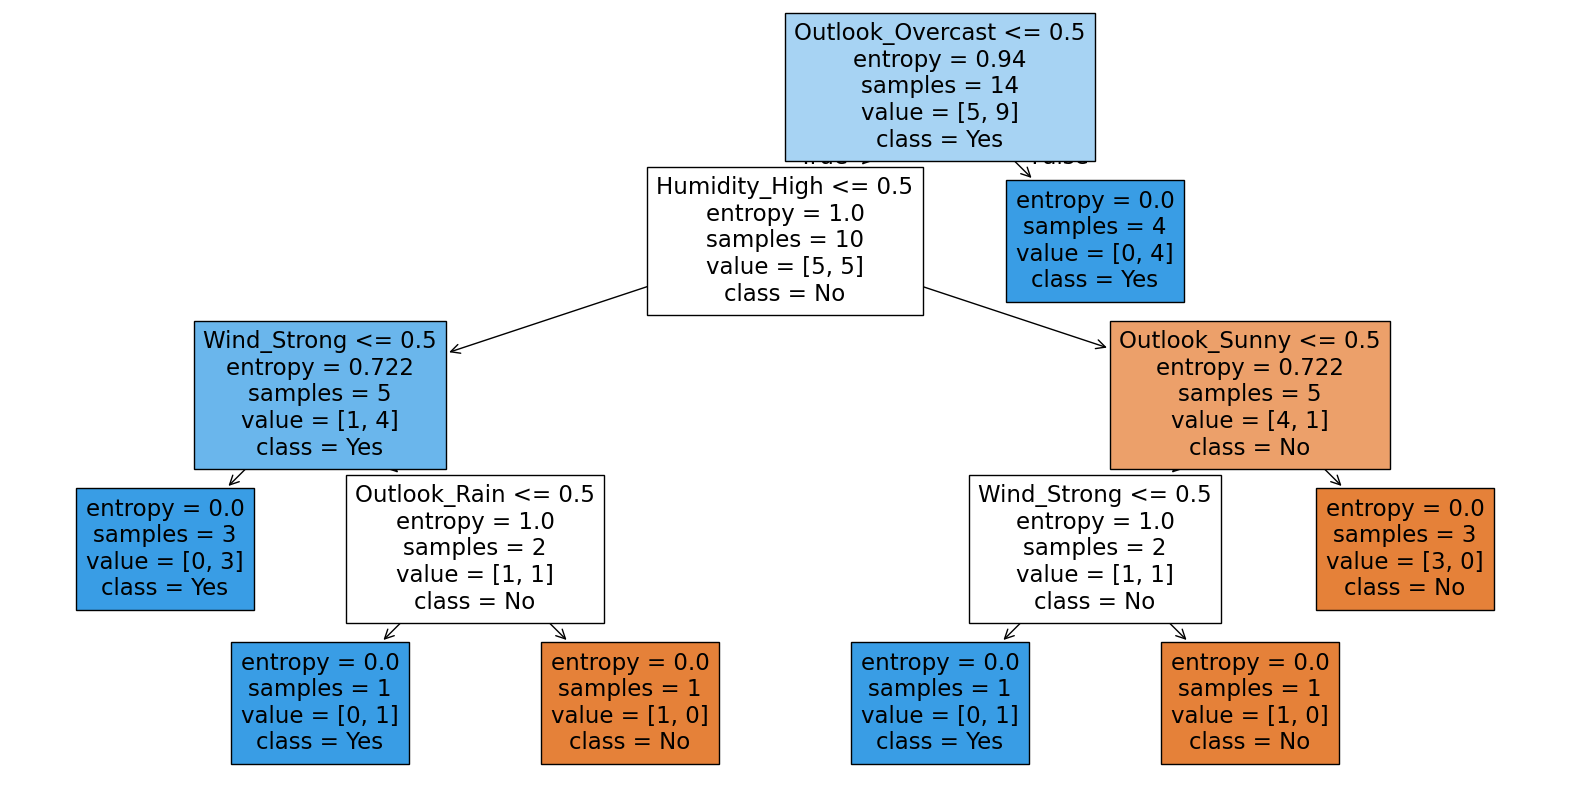

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the data for the decision tree
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['PlayTennis']

# Convert categorical data to numeric
X = pd.get_dummies(X)

# Build the decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [10]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree_.feature
    ]
    # print("def classify({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {} Then:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            class_val = tree_.value[node].argmax()
            class_label = 'Yes' if class_val == 1 else 'No'
            print("{}return '{}'".format(indent, class_label))

    recurse(0, 1)

tree_to_code(clf, X.columns)


    if Outlook_Overcast <= 0.5 Then:
        if Humidity_High <= 0.5 Then:
            if Wind_Strong <= 0.5 Then:
                return 'Yes'
            else:  # if Wind_Strong > 0.5
                if Outlook_Rain <= 0.5 Then:
                    return 'Yes'
                else:  # if Outlook_Rain > 0.5
                    return 'No'
        else:  # if Humidity_High > 0.5
            if Outlook_Sunny <= 0.5 Then:
                if Wind_Strong <= 0.5 Then:
                    return 'Yes'
                else:  # if Wind_Strong > 0.5
                    return 'No'
            else:  # if Outlook_Sunny > 0.5
                return 'No'
    else:  # if Outlook_Overcast > 0.5
        return 'Yes'
